# Предварительные действия

In [1]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
plt.rc('font', family='Verdana')

In [2]:
# Считываем данные
data = pd.read_csv("C:/Trees/Visualizations.csv", encoding='cp1251', sep = ';')
data.head()

,возраст,образование,стаж,проживание,доход,статус,дефолт
0,41,незак. высшее,17,12,176,постоянный,да
1,27,неполное среднее,10,6,31,постоянный,нет
2,40,среднее,15,14,55,постоянный,нет
3,41,среднее,15,14,120,постоянный,нет
4,24,среднее специальное,2,0,28,постоянный,да


In [3]:
# Проверяем наличие пропусков и типы переменных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
возраст        700 non-null int64
образование    700 non-null object
стаж           700 non-null int64
проживание     700 non-null int64
доход          700 non-null int64
статус         700 non-null object
дефолт         700 non-null object
dtypes: int64(4), object(3)
memory usage: 38.4+ KB
None


# Построение графиков с помощью matplotlib

## Построение гистограммы

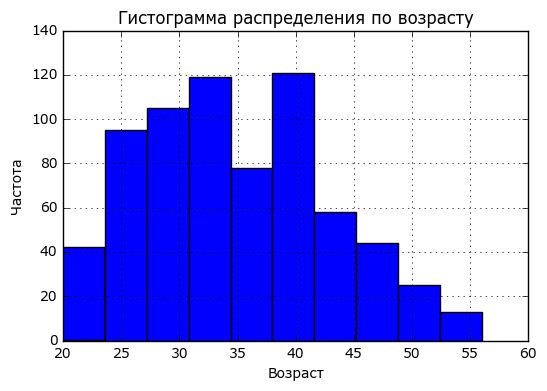

In [4]:
# Строим гистограмму распределения по возрасту
data.возраст.hist()
plt.title('Гистограмма распределения по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Частота')

## Построение круговой диаграммы

In [5]:
# Вычисляем частоты значений переменной "образование", на основе которых
# мы сформируем сектора будущей круговой диаграммы
agr_ed=data.groupby(['образование']).size()
agr_ed

образование
высшее                 163
незак. высшее           22
неполное среднее        34
среднее                283
среднее специальное    198
dtype: int64

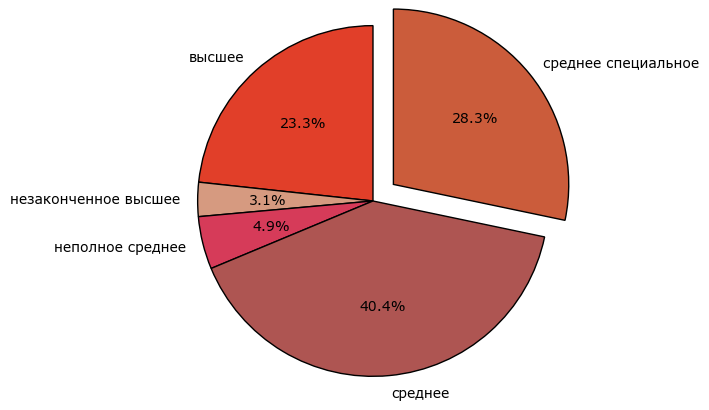

In [6]:
# Создаем список из 5 цветов по количеству будущих секторов
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B"]

# Создаем круговую диаграмму
plt.pie(
    # используем частоты значений переменной "образование"
    agr_ed,
    # задаем список меток
    labels=["высшее", "незаконченное высшее", "неполное среднее", "среднее", "среднее специальное"],
    # без использования тени
    shadow=False,
    # задаем список цветов
    colors=colors,
    # один сектор отделяем от других
    explode=(0, 0, 0, 0, 0.15),
    # задаем начальный угол в градусах
    startangle=90,
    # выводим значения в виде процентов
    autopct='%1.1f%%'
    )

plt.axis('equal')
plt.tight_layout()
plt.show()

## Построение простой столбиковой диаграммы

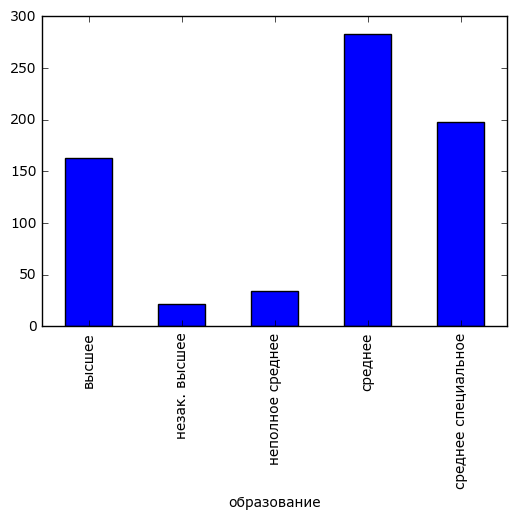

In [7]:
my_bar_plot = agr_ed.plot(kind='bar')

## Построение кластеризованной столбиковой диаграммы

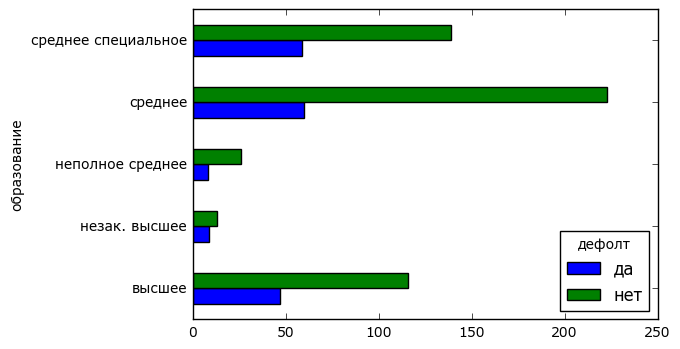

In [8]:
pd.crosstab(data.образование, data.дефолт).plot.barh(stacked=False)

## Построение состыкованной столбиковой диаграммы

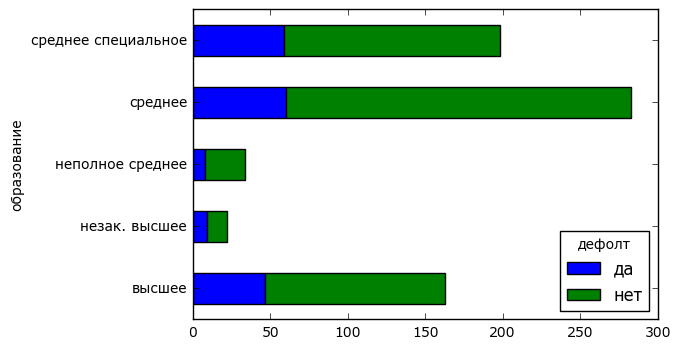

In [9]:
pd.crosstab(data.образование, data.дефолт).plot.barh(stacked=True)

## Построение диаграммы рассеяния

(0, 500.0)

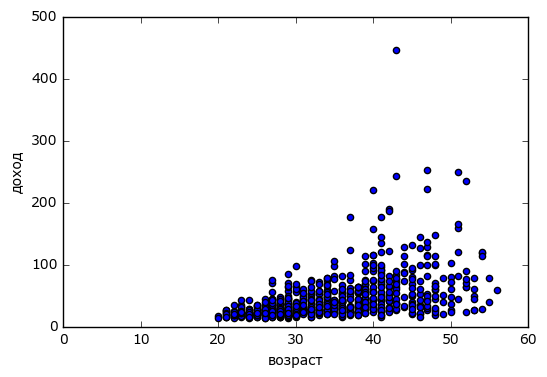

In [10]:
data.plot.scatter(x='возраст', y='доход')
plt.xlim(0)
plt.ylim(0)

# Построение графиков с помощью seaborn

In [11]:
# Импортируем библиотеку seaborn, предварительно установив ее в Anaconda Prompt с помощью
# команды conda install -c anaconda seaborn=0.7.1
import seaborn as sns

## Построение столбиковой диаграммы с настройками по умолчанию

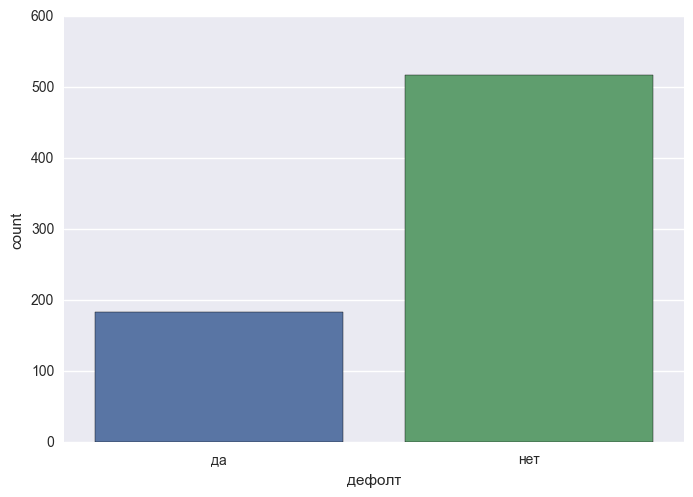

In [12]:
plot=sns.countplot(x='дефолт', data=data)

## Построение столбиковой диаграммы (изменена ориентация меток оси x)

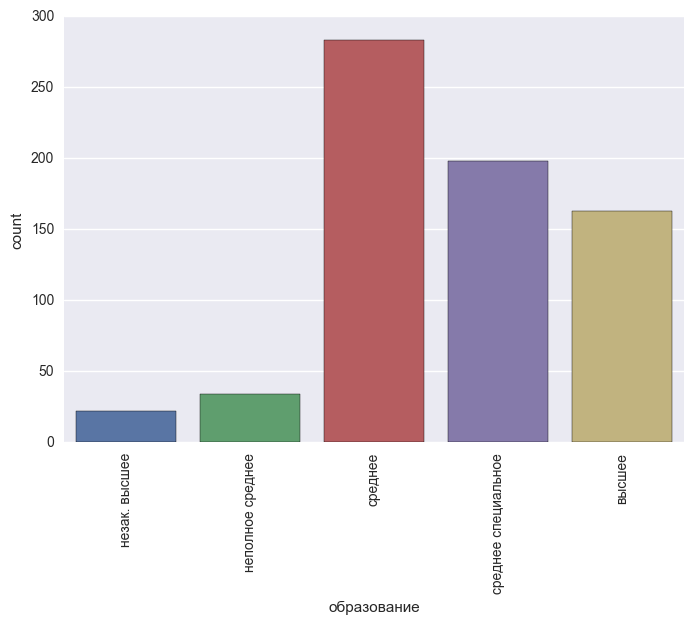

In [13]:
# Устанавливаем угол поворота меток вокруг оси x в 90 градусов
plt.xticks(rotation=90)
plot=sns.countplot(x='образование', data=data)

## Построение столбиковой диаграммы (задана процентная шкала)

### Случай 1. Количественная переменная

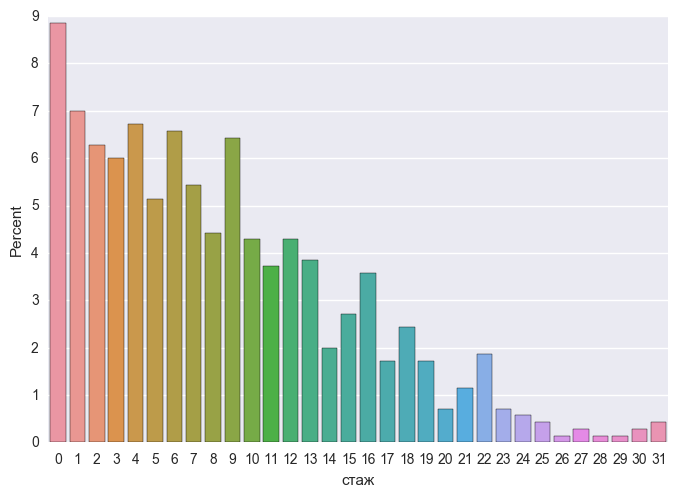

In [14]:
# Передаем в качестве параметров x и у одну и ту же переменную, а с помощью параметра 
# estimator задаем расчет процентного значения для каждого столбика
ax = sns.barplot(x="стаж", y="стаж", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel="Percent")

### Случай 2. Категориальная переменная

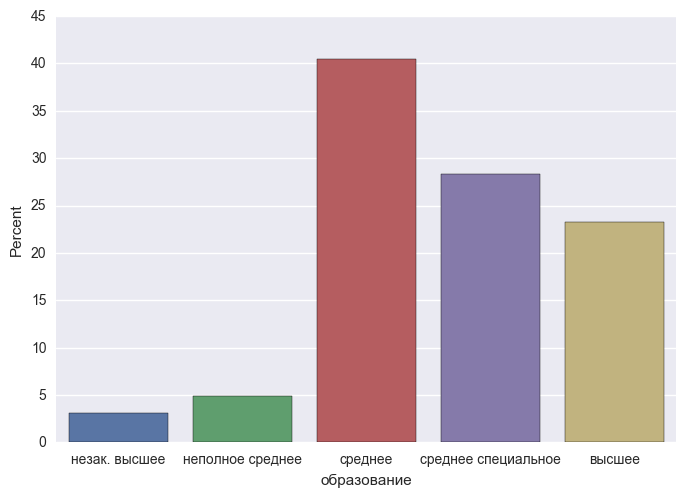

In [15]:
# Передаем в качестве параметра у любую количественную переменную
ax = sns.barplot(x="образование", y="стаж", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel="Percent")

## Построение столбиковой диаграммы (задана процентная шкала и отображение процентных значений)

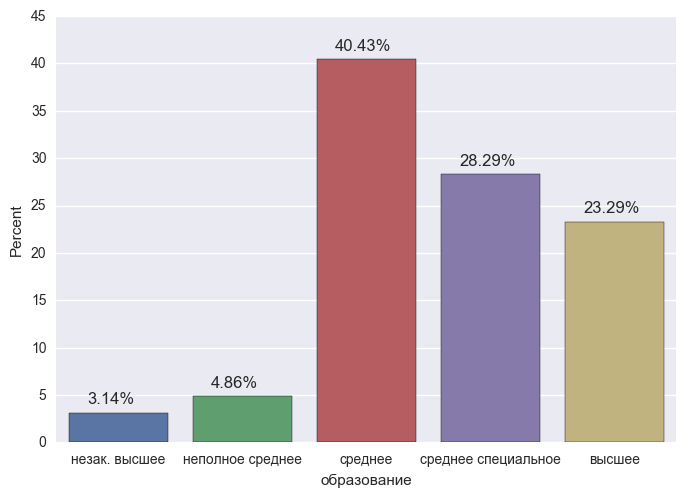

In [16]:
plot = sns.barplot(x="образование", y="стаж", data=data, estimator=lambda x: len(x) / len(data) * 100)
plot.set(ylabel="Percent")
for p in plot.patches:
    plot.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

## Построение столбиковой диаграммы (изменена ориентация диаграммы)

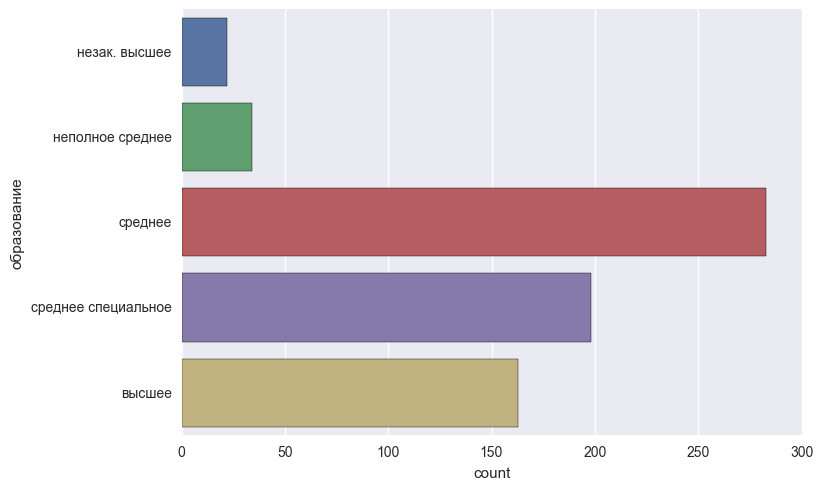

In [17]:
plot=sns.countplot(y='образование', data=data)

## Построение кластеризованной столбиковой диаграммы

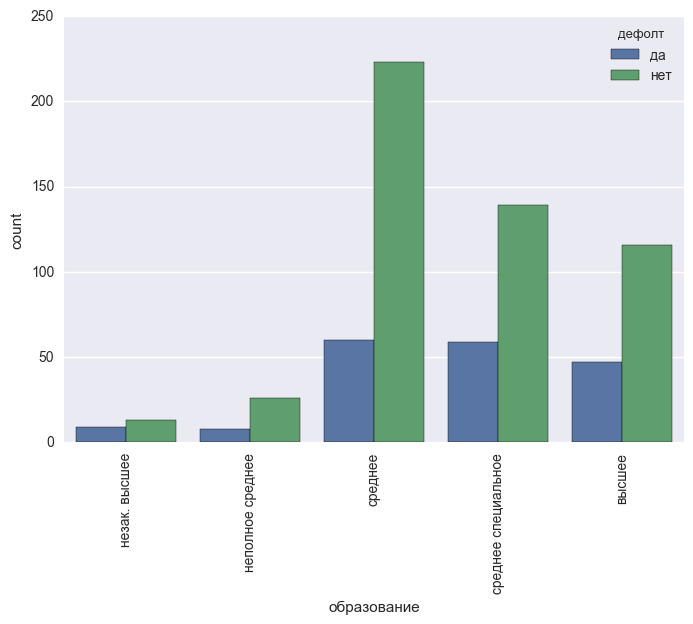

In [18]:
plt.xticks(rotation=90)
plot = sns.countplot(x="образование", hue="дефолт", data=data)

## Построение столбиковой диаграммы, где столбики - средние значения количественной переменной в уровнях категориальной переменной

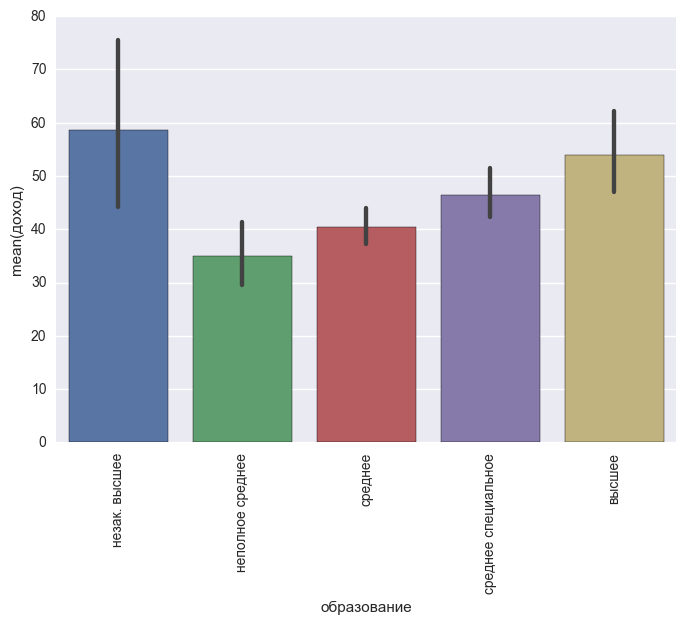

In [19]:
plt.xticks(rotation=90)
plot=sns.barplot(x='образование', y='доход', data=data)

## Построение панельной столбиковой диаграммы

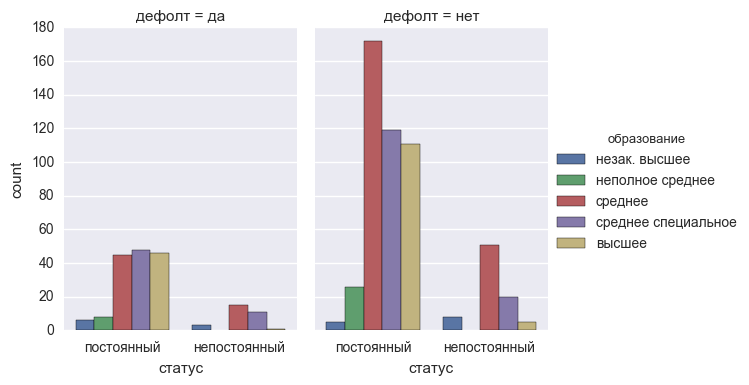

In [20]:
plot = sns.factorplot(x="статус", hue="образование", col="дефолт",
                   data=data, kind="count",
                   size=4, aspect=.7)

## Построение диаграммы рассеяния

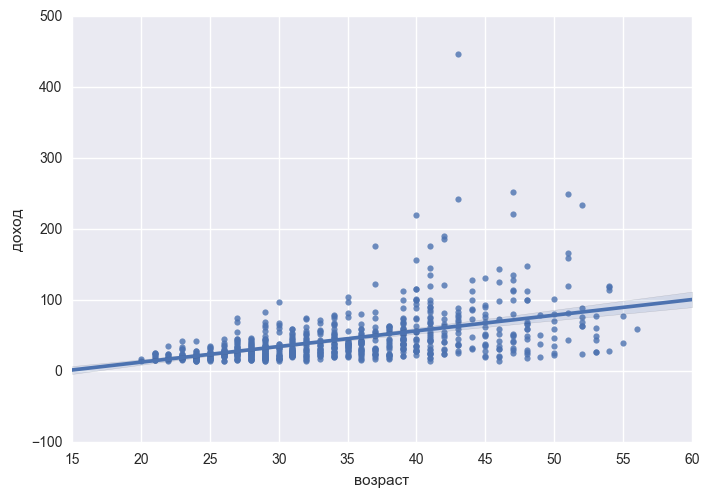

In [21]:
plot = sns.regplot(x="возраст", y="доход", data=data)

## Построение простой ящичковой диаграммы

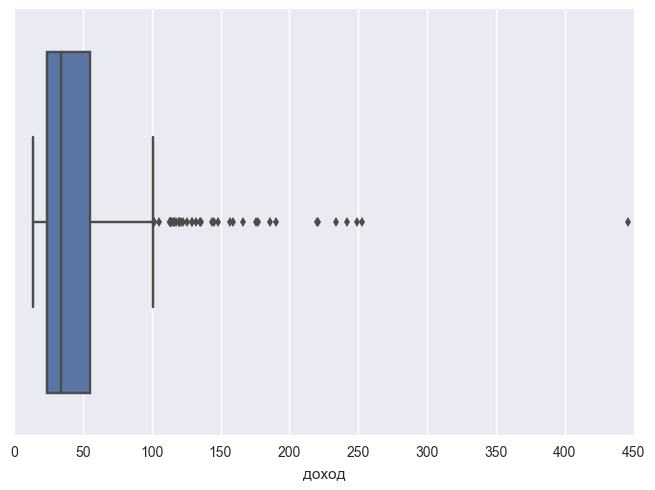

In [22]:
plot = sns.boxplot(x=data["доход"])

## Построение ящичковых диаграмм с несколькими переменными

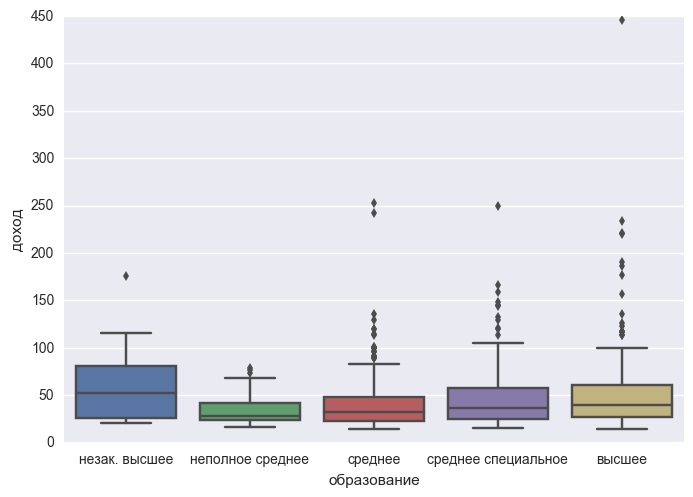

In [23]:
plot = sns.boxplot(x="образование", y="доход", data=data)

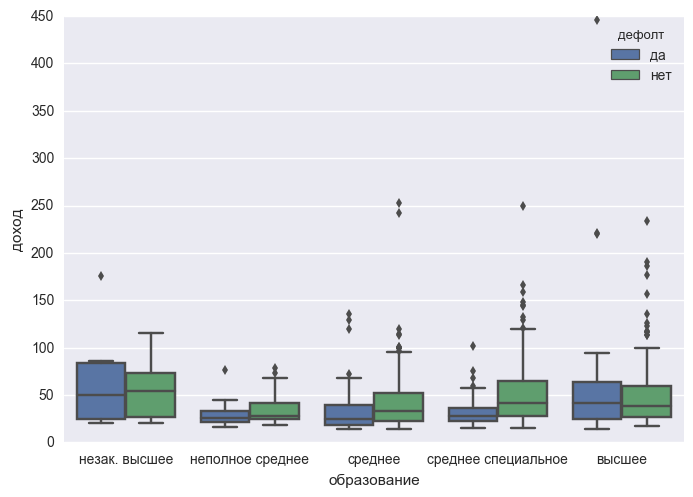

In [24]:
plot = sns.boxplot(x="образование", y="доход", hue="дефолт", data=data)

## Построение точечных диаграмм

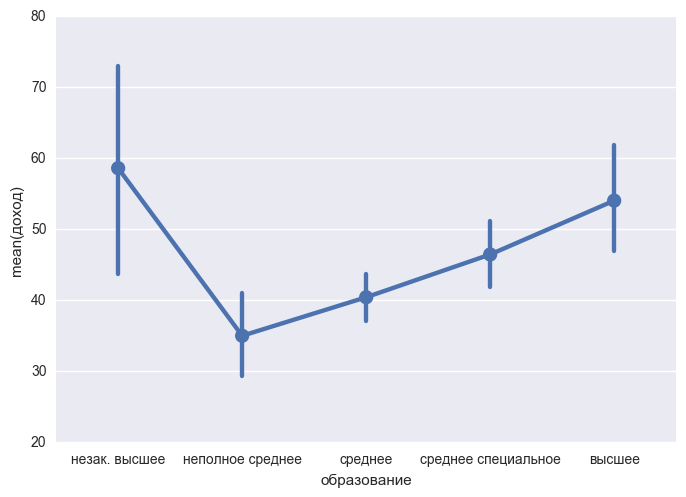

In [25]:
plot=sns.pointplot(x="образование", y="доход", data=data)

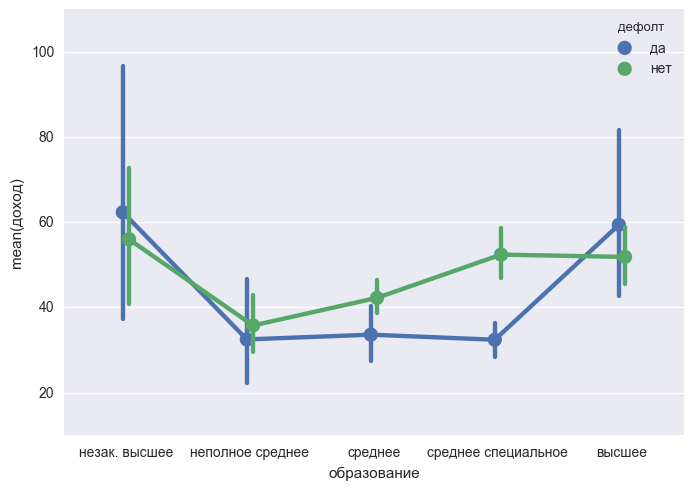

In [26]:
plot = sns.pointplot(x="образование", y="доход", hue="дефолт", data=data, dodge=True)

# Построение графиков с помощью plotly

In [27]:
# Импортируем библиотеку plotly, предварительно установив ее в Anaconda Prompt с помощью
# команды conda install -c plotly plotly=1.3.2,
# чтобы устранить ошибку Notebook Validation failed, обновите nbformat 
# в Anaconda Prompt с помощью команды conda update nbformat 
# и перезапустите Jupiter-сервер
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

## Построение круговой диаграммы

In [28]:
labels = ["высшее", "незаконченное высшее", "неполное среднее", "среднее", "среднее специальное"]
values = agr_ed

trace = go.Pie(labels=labels, values=values)

layout = go.Layout(title="Распределение клиентов по уровню образования")

fig = go.Figure(data=[trace], layout = layout)
iplot(fig)


## Построение простой столбиковой диаграммы

### Вертикальная простая столбиковая диаграмма

In [29]:
trace = go.Bar(x=["высшее", "незаконченное высшее", "неполное среднее", "среднее", "среднее специальное"], y=agr_ed)
layout = go.Layout(title="Распределение клиентов по уровню образования")

fig = go.Figure(data=[trace], layout = layout)
iplot(fig)

### Горизонтальная простая столбиковая диаграмма

In [30]:
trace = go.Bar(x=agr_ed, 
               y=["высшее", "нез. высшее", "неполн. средн.", "среднее", "средн. спец."],
               orientation = 'h')
layout = go.Layout(title="Распределение клиентов по уровню образования")

fig = go.Figure(data=[trace], layout = layout)
iplot(fig)

## Построение состыкованной столбиковой диаграммы

In [31]:
yes=data.loc[data['дефолт'] == 'да']
no=data.loc[data['дефолт'] == 'нет']
agr_yes=yes.groupby(['образование']).size()
agr_no=no.groupby(['образование']).size()

In [32]:
trace1 = go.Bar(
    x=["высшее", "незаконченное высшее", "неполное среднее", "среднее", "среднее специальное"],
    y=agr_no,
    name='Нет'
)
trace2 = go.Bar(
    x=["высшее", "незаконченное высшее", "неполное среднее", "среднее", "среднее специальное"],
    y=agr_yes,
    name='Да'
)

layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data = [trace1, trace2], layout = layout)
iplot(fig)

## Построение кластеризованной столбиковой диаграммы

In [39]:
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=[trace1, trace2], layout = layout)
iplot(fig)